$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




##Question  no 1.2

$\textbf{Question:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [ ]:
import numpy as np 
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([[3000,4],[4,2]])
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  lembda_max=np.linalg.eigvals(A).max()
  lembda_min=np.linalg.eigvals(A).min()
  return lembda_max/lembda_min

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

##Question no 1.4

$\textbf{Question:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$


Q=
$\begin{bmatrix}
1500 & 2\\
2 & 1
\end{bmatrix}$

if we consider f(x)=$X^{T}QX + b^TX $

in general

The matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling can be written as:-

$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}\ \ \ $
Where, $\mathbf{H}^k = (\nabla^2f(\mathbf{x})) $ is the hessian of a function for $k^{th}$ iteration.

or we can take $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$.
and Q as Hessian of  $g(\mathbf{y})$ i.e. $Q= \nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}   \ where \ \  M=D^{\frac{1}{2}}$

##Question number 1.5

$\textbf{Question:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$

yes we can take $D^k$ as diag  $[(\frac{\delta^2f}{\delta x_1^2})^{-1},(\frac{\delta^2f}{\delta x_2^2})^{-1} , (\frac{\delta^2f}{\delta x_3^2})^{-1}, ...............(\frac{\delta^2f}{\delta x_n^2})^{-1}]$

which is approx simillar to 1/(eigenvalue of hessian matrix) not exact but sufficient for solving above question 

refrence Nonlinear Programming,Dimitri P. Bertsekas
 


##Question Number 1.6

Write code to find the matrix $\mathbf{D}^k$. 

In [ ]:
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  return np.array([[1/3000,0],[0,1/2]])
  

In [ ]:
def evalf(x):  
  assert type(x) is np.ndarray and len(x) == 2
  r=0
  r=np.float128(r)
  r=1500*(x[0]**2)+4*x[0]*x[1]+x[1]**2
  return r
  


In [ ]:
def evalg(x):  
  assert type(x) is np.ndarray and len(x) == 2
  return np.array([3000*x[0]+4*x[1],4*x[0]+2*x[1]],dtype='float128')
  



 given that a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$

we have $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$

since $\mathbf{A}$ is symmetric matrix

$\Rightarrow  \nabla f(\mathbf{x})=2*\mathbf{A}*\mathbf{x} + 2 * \mathbf{b}$


 now we have to minimize the function $f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ where $\alpha \ge 0$

 let g($\alpha$)=$f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$

 by fermat's theorem necessary condition for optimality is $g'(\alpha)=0$

 taking derivative with respect to $\alpha$


 $\frac{d\ g(\alpha)}{d \ \alpha}$=$\frac{d(f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))}{d(\mathbf{x} - \alpha \nabla f(\mathbf{x}))}*\frac{d(\mathbf{x} - \alpha \nabla f(\mathbf{x}))}{d\alpha}=0$

 by chain rule 

 $\Rightarrow (\nabla f(\mathbf{x} - \alpha \nabla f(\mathbf{x})))^\top*\nabla f(\mathbf{x})=0 $

 taking transpose both side 

 $\Rightarrow (\nabla f(\mathbf{x}))^\top*(\nabla f(\mathbf{x} - \alpha \nabla f(\mathbf{x})))=0 $

 since $  \nabla f(\mathbf{x})=2*\mathbf{A}*\mathbf{x} + 2 * \mathbf{b}$ 

 $\Rightarrow (\nabla f(\mathbf{x}))^\top*[2*A*(\mathbf{x} - \alpha \nabla f(\mathbf{x}))+2*b]=0 $

 $\Rightarrow (\nabla f(\mathbf{x}))^\top*A*\mathbf{x} -\alpha * (\nabla f(\mathbf{x}))^\top * A * (\nabla f(\mathbf{x})) + (\nabla f(\mathbf{x}))^\top*\mathbf{b}=0$

 $\Rightarrow \alpha * (\nabla f(\mathbf{x}))^\top * A * (\nabla f(\mathbf{x}))=(\nabla f(\mathbf{x}))^\top * A* \mathbf{x}+(\nabla f(\mathbf{x}))^\top * \mathbf{b}$

 $\Rightarrow \alpha=\frac{(\nabla f(\mathbf{x}))^\top * A* \mathbf{x}+(\nabla f(\mathbf{x}))^\top * \mathbf{b}}{(\nabla f(\mathbf{x}))^\top * A * (\nabla f(\mathbf{x}))}$

  $\Rightarrow \alpha=\frac{(\nabla f(\mathbf{x}))^\top * (A* \mathbf{x}+\mathbf{b})}{(\nabla f(\mathbf{x}))^\top * A * (\nabla f(\mathbf{x}))}$

  $\Rightarrow \alpha=\frac{(\nabla f(\mathbf{x}))^\top *\nabla f(\mathbf{x})}{2*(\nabla f(\mathbf{x}))^\top * A * (\nabla f(\mathbf{x}))}$

where $\nabla f(\mathbf{x})=2*\mathbf{A}*\mathbf{x} + 2 * \mathbf{b}$

now we have to prove that $\alpha $ is minimum value

$\frac{d^2 (g(\alpha))}{d\alpha^2}>0 \\ since \nabla^2f(\mathbf(x))=2*A \ \ which \ \ is \ \ symmetric \ \ and \ \  positive \ \  definite \ \  marix $

$\Rightarrow \alpha \ \ is \ \ minimum \ \ value$



In [ ]:
def compute_steplength_exact(gradf, A): 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2
  num=np.matmul(gradf.transpose(),gradf)
  den=np.matmul(np.matmul(gradf.transpose(),A),gradf)
  step_length=num/(2*den)
  return step_length
  

In [ ]:
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p_k=-gradf
  while evalf(x+alpha*p_k)>evalf(x)+gamma*alpha*np.matmul(gradf.T,p_k):
    alpha=rho*alpha
  #print('final step length:',alpha)
  return alpha
  
  

In [ ]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  while evalf(np.subtract(x,alpha*direction))>evalf(x)-gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha
  #print('final step length:',alpha)
  return alpha
  

In [ ]:

EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:

def find_minimizer_gd(start_x, tol, line_search_type,*args):
  assert type(start_x) is np.ndarray and len(start_x) == 2 
  assert type(tol) is float and tol>=0 

  A = np.array([[1500,2],[2,1]])
  x = start_x
  g_x = evalg(x)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
        #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength      
     # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1   
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k,evalf(x)
  #Complete the code   


In [ ]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)
  d_k=compute_D_k(x)
  dir=np.matmul(d_k,g_x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
        #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x,dir, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength      
     # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1   
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,dir)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    d_k=compute_D_k(x)
    dir=np.matmul(d_k,g_x)

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', dir, ' gradient norm:', np.linalg.norm(g_x))
  return x,k,evalf(x)
  #Complete the code   


##Question no 1.7

we can find solution  by analytical method minimizer of function is [0,0] and minimum function value is 0

In [ ]:
my_start_x = np.array([1,4000])
my_tol= 1e-12

In [ ]:
#check gradient descent with exact line search 
x,k,fu=find_minimizer_gd(my_start_x,my_tol,EXACT_LINE_SEARCH)
print('gradient descent algorithm(without scaling) with exact line search')
print('minimizer of function is ',x)
print('number of iteration taken by algorithm is',k)
print('minimum function value is ',fu)

gradient descent algorithm(without scaling) with exact line search
minimizer of function is  [-7.44595231e-16  4.61544291e-13]
number of iteration taken by algorithm is 14075
minimum function value is  2.1248011077928182463e-25


In [ ]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x,k,fu=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print('gradient descent algorithm(without scaling) with backtracking line search')
print('minimizer of function is ',x)
print('number of iteration taken by algorithm is',k)
print('minimum function value is ',fu)


gradient descent algorithm(without scaling) with backtracking line search
minimizer of function is  [-4.78532202e-16  4.53575301e-13]
number of iteration taken by algorithm is 21985
minimum function value is  2.0520584176089342136e-25


In [ ]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x,k,fu=find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print('gradient descent algorithm(with scaling) with backtracking line search')
print('minimizer of function is ',x)
print('number of iteration taken by algorithm is',k)
print('minimum function value is ',fu)

gradient descent algorithm(with scaling) with backtracking line search
minimizer of function is  [-2.31674405e-18  9.60515434e-16]
number of iteration taken by algorithm is 16
minimum function value is  9.217397790469289959e-31


##Question 1.8

gradient descent algorithm(without scaling) with exact line search

minimizer of function is  [-7.44595231e-16  4.61544291e-13]

number of iteration taken by algorithm is 14075

minimum function value is  2.1248011077928182463e-25



$ \\ \\ $ 

Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5

gradient descent algorithm(without scaling) with backtracking line search

minimizer of function is  [-4.78532202e-16  4.53575301e-13]

number of iteration taken by algorithm is 21985

minimum function value is  2.0520584176089342136e-25

$\\ \\ $

Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5

gradient descent algorithm(with scaling) with backtracking line search

minimizer of function is  [-2.31674405e-18  9.60515434e-16]

number of iteration taken by algorithm is 16

minimum function value is  9.217397790469289959e-31




$\huge{observation}$


minimizer and minimum function value is approx same for each algorithm
number of iteration taken gradient descent algorithm(without scaling) with backtracking line search is very large compare to another algorithm in our question minimum number of iteration is taken by  gradient descent algorithm(with scaling) with backtracking line search  so for our question we can say that gradient descent algorithm(with scaling) with backtracking line search is useful compare to another algorithm

Still backtracking with scaling always has an edge over backtracking without scaling in both minimizer and minimimum function value.

iteration taken by gradient descent algorithm(without scaling) with exact line search is in middle of another two algorithm 

also minimum function value of gradient descent algorithm(with scaling) with backtracking line search is more accurate compare to another algorithm as mention also minimizer is also more accurate so,gradient descent algorithm(with scaling) with backtracking line search is good choice for this problem  


In [ ]:
my_start_x = np.array([1,4000])
my_tol= 1e-12
rho = 0.5
gamma = 0.5
alpha=[1.0,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
result=[]
print('gradient descent algorithm(without scaling) with backtracking line search')
for i in alpha:
  x,k,fu=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,i,rho,gamma)
  result.append([i,x,k,fu])
result=np.array(result).T

gradient descent algorithm(without scaling) with backtracking line search


<ipython-input-15-10475e733844>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result=np.array(result).T


In [ ]:
my_start_x = np.array([1,4000])
my_tol= 1e-12
rho = 0.5
gamma = 0.5
alpha=[1.0,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
result1=[]
print('gradient descent algorithm(with scaling) with backtracking line search')
for i in alpha:
  x,k,fu=find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,i,rho,gamma)
  result1.append([i,x,k,fu])
result1=np.array(result1).T

gradient descent algorithm(with scaling) with backtracking line search


<ipython-input-16-dd34ccfc2523>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result1=np.array(result1).T


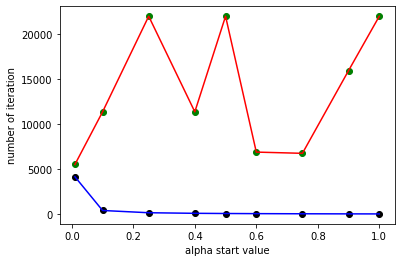

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result[0],result[2],color='red',label='gradient descent algorithm(without scaling) with backtracking line search')
plt.scatter(result[0],result[2],color='green')
plt.plot(result1[0],result1[2],color='blue',label='gradient descent algorithm(with scaling) with backtracking line search')
plt.scatter(result1[0],result1[2],color='black')
plt.xlabel('alpha start value')
plt.ylabel('number of iteration')
plt.show()

|index|alpha value|without scaling minimizer|with scaling minimizer|without scaling number of iteration|with scaling number of iteration|without scaling minimum function value|with scaling minimum function value|
|---|---|---|---|---|---|---|---|
|0|1\.0|\[-4\.78532202e-16  4\.53575301e-13\]|\[-2\.31674405e-18  9\.60515434e-16\]|21985|16|2\.0520584176089343e-25|9\.21739779046929e-31|
|1|0\.9|\[-5\.48799355e-16  4\.71515450e-13\]|\[-1\.54825431e-16  5\.99636318e-15\]|15941|21|2\.21743521317482e-25|6\.819918471923892e-29|
|2|0\.75|\[-7\.18643891e-16  4\.89175378e-13\]|\[-2\.78273450e-16  1\.07784868e-14\]|6750|32|2\.386610528547956e-25|2\.2033248072173855e-28|
|3|0\.6|\[-6\.07554226e-16  4\.94036636e-13\]|\[-3\.37385169e-16  1\.30849588e-14\]|6887|47|2\.4342526428386637e-25|3\.2430059206322122e-28|
|4|0\.5|\[-4\.78532202e-16  4\.53575301e-13\]|\[-2\.51144512e-16  9\.75949896e-15\]|21985|62|2\.0520584176089343e-25|1\.8005399028050106e-28|
|5|0\.4|\[-7\.24091328e-16  4\.84454819e-13\]|\[-3\.26530890e-16  1\.27315971e-14\]|11362|83|2\.3407977615582553e-25|3\.0539815808527883e-28|
|6|0\.25|\[-4\.78532202e-16  4\.53575301e-13\]|\[-2\.68853026e-16  1\.05480788e-14\]|21985|147|2\.0520584176089343e-25|2\.0834135979657724e-28|
|7|0\.1|\[-7\.24091328e-16  4\.84454819e-13\]|\[-3\.34815103e-16  1\.32481337e-14\]|11362|397|2\.3407977615582553e-25|3\.2592207464795357e-28|
|8|0\.01|\[-5\.80852788e-16  4\.86459735e-13\]|\[-3\.51028779e-16  1\.39670836e-14\]|5509|4146|2\.360189123704422e-25|3\.6029983622118485e-28|

##Question number 1.9

as we can see from above graph for every choice of $\alpha_0$ number of iteration taken by gradient descent algorithm(without scaling) with backtracking line search is more than gradient descent algorithm(with scaling) with backtracking line search 

for gradient descent algorithm(without scaling) with backtracking line search
number of iteration fluctuate it takes maximum number of iteration for $\alpha_0=1\ , \ 0.5\ \ and \ 0.25 $ so we can say these three value is bad choice for $\alpha_0$
minimum number of iteration taken for $\alpha_0 =0.01$ so $\alpha_0=0.01$ is best choice for this algorithm


for gradient descent algorithm(with scaling) with backtracking line search
number of iteration is increased as we decrease $\alpha_0$ value so we can see that for this algorithm best choice of $\alpha_0$ value is 1.0


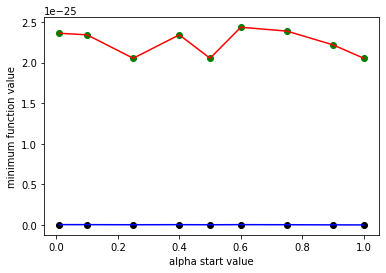

In [ ]:
plt.plot(result[0],result[3],color='red',label='gradient descent algorithm(without scaling) with backtracking line search')
plt.scatter(result[0],result[3],color='green')
plt.plot(result1[0],result1[3],color='blue',label='gradient descent algorithm(with scaling) with backtracking line search')
plt.scatter(result1[0],result1[3],color='black')
plt.xlabel('alpha start value')
plt.ylabel('minimum function value')
plt.show()

minimizer and objective function value is approx same for each choice of $\alpha_0$ 

for gradient descent algorithm(without scaling) with backtracking line search objective function value is slightly oscillate

for gradient descent algorithm(with scaling) with backtracking line search 

as we decrease $\alpha_0$ value objective function value reached to true objective function value i.e. objectie function value decrease as $\alpha_0$ decrease
 

we can see from above  backtracking with scaling always has an edge over backtracking without scaling in both minimizer and minimimum function value

##Question No 1.10

In [ ]:
my_start_x = np.array([1,4000])
my_tol= 1e-12
gamma = 0.5
rho=[0.9,0.8,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
result2=[]
alpha=1.0
print('gradient descent algorithm(without scaling) with backtracking line search')
for i in rho:
  x,k,fu=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha,i,gamma)
  result2.append([i,x,k,fu])
result2=np.array(result2).T

gradient descent algorithm(without scaling) with backtracking line search


<ipython-input-21-2362a4933ac1>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result2=np.array(result2).T


In [ ]:
my_start_x = np.array([1,4000])
my_tol= 1e-12
gamma = 0.5
rho=[0.9,0.8,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
result3=[]
alpha=1.0
print('gradient descent algorithm(with scaling) with backtracking line search')
for i in rho:
  x,k,fu=find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha,i,gamma)
  result3.append([i,x,k,fu])
result3=np.array(result3).T

gradient descent algorithm(with scaling) with backtracking line search


<ipython-input-22-e5f016537689>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result3=np.array(result3).T


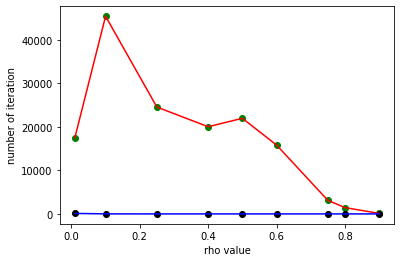

In [ ]:
plt.plot(result2[0],result2[2],color='red',label='gradient descent algorithm(without scaling) with backtracking line search')
plt.scatter(result2[0],result2[2],color='green')
plt.plot(result3[0],result3[2],color='blue',label='gradient descent algorithm(with scaling) with backtracking line search')
plt.scatter(result3[0],result3[2],color='black')
plt.xlabel('rho value')
plt.ylabel('number of iteration')
plt.show()

|index|rho value|without scaling minimizer|with scaling minimizer|without scaling number of iteration|with scaling number of iteration|without scaling minimum function value|with scaling minimum function value|
|---|---|---|---|---|---|---|---|
|0|0\.9|\[-6\.44686128e-16  4\.90962904e-13\]|\[-1\.90920422e-16  3\.38018326e-15\]|127|14|2\.404019351870076e-25|6\.35201662200206e-29|
|1|0\.8|\[-6\.99968590e-16  4\.40149178e-13\]|\[-3\.89959677e-18  7\.65599523e-16\]|1471|15|1\.932338703071819e-25|5\.97010794351519e-31|
|2|0\.75|\[-7\.15454842e-16  4\.83616543e-13\]|\[-3\.59593964e-18  9\.57478862e-16\]|3135|15|2\.332687511412065e-25|9\.223897999650187e-31|
|3|0\.6|\[-7\.07691748e-16  4\.70469643e-13\]|\[-2\.68496827e-18  1\.53311688e-15\]|15834|15|2\.207611361654381e-25|2\.3447954703965862e-30|
|4|0\.5|\[-4\.78532202e-16  4\.53575301e-13\]|\[-2\.31674405e-18  9\.60515434e-16\]|21985|16|2\.0520584176089343e-25|9\.21739779046929e-31|
|5|0\.4|\[-5\.16461460e-16  4\.67846629e-13\]|\[-2\.10920879e-18  1\.38155681e-15\]|20049|16|2\.1831406770108283e-25|1\.9037164073888824e-30|
|6|0\.25|\[-5\.67128954e-16  4\.70177132e-13\]|\[-6\.9534609e-16  4\.5561674e-13\]|24570|16|2\.20482384220675e-25|2\.0704462793405916e-25|
|7|0\.1|\[-4\.35224428e-16  4\.42644725e-13\]|\[-6\.22892805e-16  4\.51919078e-13\]|45435|23|1\.954478834023159e-25|2\.036868574485398e-25|
|8|0\.01|\[-6\.03891924e-16  4\.89972672e-13\]|\[-5\.88632151e-16  4\.39928337e-13\]|17463|130|2\.39436685429117e-25|1\.9302084997635644e-25|

$\huge{observation}$

as we can see from above graph for gradient descent algorithm(without scaling) with backtracking line search   as rho decreases number of iteration increases  upto 0.5 after that it oscilate 
 if we have to consider best rho value then best $\rho$ value is 0.9 since it takes less iteration comapare to other 

 for gradient descent algorithm(with scaling) with backtracking line search  number of iteration increases as rho value decreases if we have to consider best rho value than for this algorithm best rho value is 0.9 

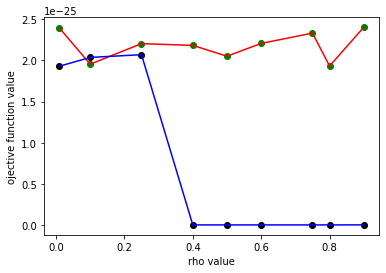

In [ ]:
plt.plot(result2[0],result2[3],color='red',label='gradient descent algorithm(without scaling) with backtracking line search')
plt.scatter(result2[0],result2[3],color='green')
plt.plot(result3[0],result3[3],color='blue',label='gradient descent algorithm(with scaling) with backtracking line search')
plt.scatter(result3[0],result3[3],color='black')
plt.xlabel('rho value')
plt.ylabel('ojective function value')
plt.show()

here for  gradient descent algorithm(without scaling) with backtracking line search we can see that minimum objective function value is approx same slightly oscilate for each $\rho$ value 

for gradient descent algorithm(with scaling) with backtracking line search 
objective function value is approx same for each each rho 

we can also see from above graph we get more accurate minimum objective function value when we done scalling compare to when we does'nt done scalling 

here for each rho value except rho=0.1 we got less minimum function value when we done scalling compare to when we doesn't done scalling

for both algorithm minimiser is approx same slightly oscilate but approx same 

so here our main purpose to get a rho value that takes less iteration  for that 
for scalling rho=0.9 and for non scaliing also 0.9 is good